In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# git%matplotlib inline

# Reading our data

In [3]:
bookings_data = pd.read_csv('./data/hotel_bookings.csv')

In [4]:
bookings_data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
bookings_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**!NB** First, understand the data you have. Find any available metadata.

# Let's have another look at defining a problem...

We discussed that before starting our data storytelling journey, we have to understand what problem we are trying to solve.

However, sometimes problems are discovered only after we have **explored** our data - a process called **Exploratory Data Analysis (EDA)**.

# Exploratory Data Analysis

Out dataset consists of data from two different hotels located in Portugal --> one Resort hotel and one City hotel.

The data contains "bookings **due to arrive** between the 1st of July of 2015 and the 31st of August 2017".

In [6]:
bookings_data.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [7]:
bookings_data.arrival_date_year.unique()

array([2015, 2016, 2017], dtype=int64)

In [8]:
bookings_data[bookings_data['arrival_date_year'] == 2015]['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [9]:
bookings_data[bookings_data['arrival_date_year'] == 2017]['arrival_date_month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

## 1. Where do our guest come from?

In [10]:
customers_by_country = pd.DataFrame(bookings_data.country.value_counts().sort_values(ascending=False))
customers_by_country.rename(columns={'country': 'count'}, inplace=True)
total_guests = customers_by_country['count'].sum()
customers_by_country["guest_%"] = round(customers_by_country["count"] / total_guests * 100, 2)
customers_by_country["country"] = customers_by_country.index

In [11]:
#bookings_data[bookings_data['is_canceled'] == 0]

In [12]:
customers_by_country

,count,guest_%,country
country,,,
PRT,48590,40.87,PRT
GBR,12129,10.20,GBR
FRA,10415,8.76,FRA
ESP,8568,7.21,ESP
DEU,7287,6.13,DEU
...,...,...,...
AIA,1,0.00,AIA
NCL,1,0.00,NCL
SDN,1,0.00,SDN


In [13]:
customers_by_country['count']

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
AIA        1
NCL        1
SDN        1
KIR        1
NAM        1
Name: count, Length: 177, dtype: int64

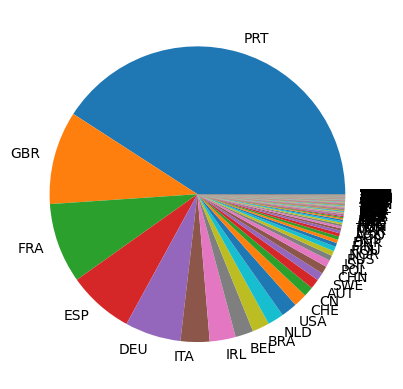

In [14]:
plt.pie(x=customers_by_country['count'],
       labels=customers_by_country['country'])    
plt.show()

Always optimize your piecharts!

In [15]:
top_5_countries = customers_by_country.head()

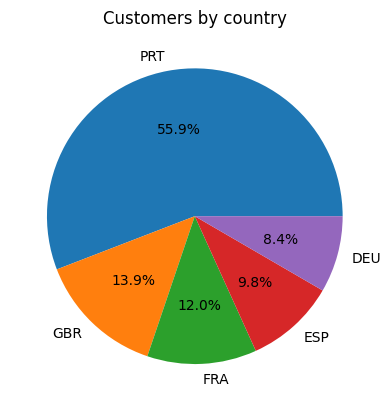

In [16]:
plt.pie(x=top_5_countries['count'],
       labels=top_5_countries['country'],
       autopct='%1.1f%%')
plt.title('Customers by country')
plt.show()

Be very careful with pie charts! They might seem correct, but they might not be...

There is one more problem --> remember that these are the results for all the bookings --> let's remove the cancelled ones.

## 2. How much do guests pay for a room per night?

Be careful! Take into account the following:
- we have two different hotels
- there is seasonality in the data

In [33]:
bookings_data.adults
bookings_data.children
bookings_data.babies

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: babies, Length: 119389, dtype: int64

In [34]:
pd.set_option('use_inf_as_na', True)
resort_hotel_data = bookings_data.loc[(bookings_data['hotel'] == 'Resort Hotel') & (bookings_data['is_canceled'] == 0)]
city_hotel_data = bookings_data.loc[(bookings_data['hotel'] == 'City Hotel') & (bookings_data['is_canceled'] == 0)]

C:\Users\TonyTech\AppData\Local\Temp\ipykernel_27860\3873862304.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na', True)


In [19]:
#adr == average daily rate

In [20]:
resort_hotel_data['adr_per_person'] = resort_hotel_data['adr'] / (resort_hotel_data['adults'] + resort_hotel_data['children'])
city_hotel_data['adr_per_person'] = city_hotel_data['adr'] / (city_hotel_data['adults'] + city_hotel_data['children'])

C:\Users\TonyTech\AppData\Local\Temp\ipykernel_27860\234211646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_hotel_data['adr_per_person'] = resort_hotel_data['adr'] / (resort_hotel_data['adults'] + resort_hotel_data['children'])
C:\Users\TonyTech\AppData\Local\Temp\ipykernel_27860\234211646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel_data['adr_per_person'] = city_hotel_data['adr'] / (city_hotel_data['adults'] + city_hotel_data['children'])


In [21]:
resort_hotel_data.adr_per_person.mean(), city_hotel_data.adr_per_person.mean()

(47.48886565607679, 59.27298771446344)

In [22]:
resort_hotel_data.adr_per_person.std(), city_hotel_data.adr_per_person.std()

(27.57294823445102, 27.578193536205724)

## 3. How many cancelations do we have?

In [23]:
rh_cancellations = bookings_data[bookings_data.hotel=='Resort Hotel']['is_canceled'].value_counts()
rh_cancellations

is_canceled
0    28938
1    11122
Name: count, dtype: int64

In [24]:
ch_cancellations = bookings_data[bookings_data.hotel=='City Hotel']['is_canceled'].value_counts()

In [25]:
rh_cancellations.values[1] / rh_cancellations.values[0]

0.3843389315087428

In [26]:
ch_cancellations.values[1] / ch_cancellations.values[0]

0.716059531020161

## 4. How does deposits affect cancelation?

In [27]:
bookings_data.drop(bookings_data[bookings_data.adr > 1000].index.values, inplace=True)

In [28]:
deposit_cancel_data = bookings_data.groupby("deposit_type")["is_canceled"].describe()

In [29]:
deposit_cancel_data

,count,mean,std,min,25%,50%,75%,max
deposit_type,,,,,,,,
No Deposit,104641.0,0.283770,0.450829,0.0,0.0,0.0,1.0,1.0
Non Refund,14586.0,0.993624,0.079597,0.0,1.0,1.0,1.0,1.0
Refundable,162.0,0.222222,0.417029,0.0,0.0,0.0,0.0,1.0


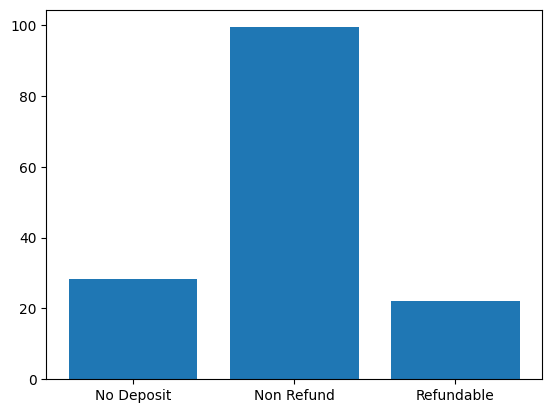

In [30]:
plt.bar(deposit_cancel_data.index, deposit_cancel_data["mean"] * 100)
plt.show()

## 5. How does average daily rate affect cancelation?

In [31]:
adr_cancel_data = bookings_data.groupby("adr")["is_canceled"].describe()

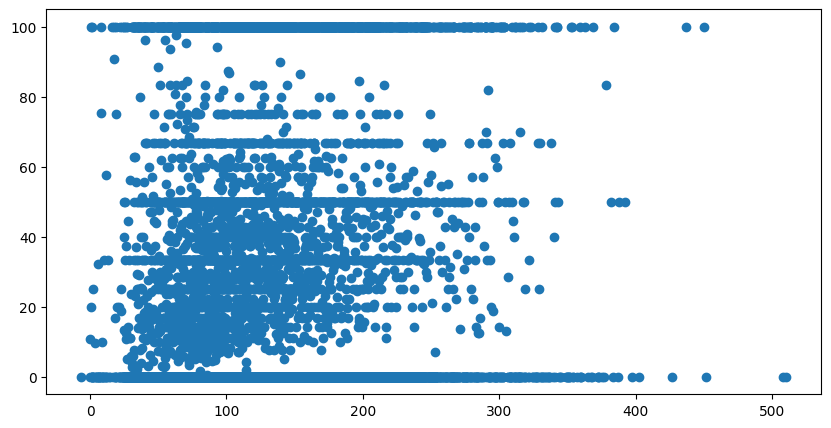

In [32]:
plt.figure(figsize=(10, 5))
plt.scatter(adr_cancel_data.index, adr_cancel_data["mean"] * 100)
plt.show()